# Необхідно виконати:

## Прочитайте csv файл (використовуйте функцію read_csv) та виведіть перші 5 рядків (використовується функція head)

In [7]:
import pandas as pd

books = pd.read_csv('bestsellers with categories.csv')
books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


## Виведіть розміри датасету (використовуйте атрибут shape)

In [11]:
books.shape

(550, 7)

### Відповідь: Про скільки книг зберігає дані датасет?  
*Про 550 книг.*

# Первинне дослідження даних

In [9]:
books.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

## Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

In [8]:
books.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

### Відповідь: Чи є в якихось змінних пропуски? (Так / ні)  
*Ні.*

## Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

In [27]:
books['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

### Відповідь: Які є унікальні жанри?  
*Non Fiction та Fiction.*

## Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

<Axes: xlabel='price', ylabel='Count'>

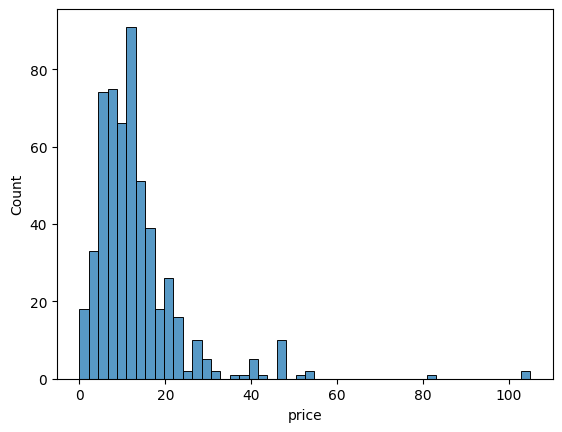

In [25]:
import seaborn as sns
sns.histplot(data=books, x='price')

## Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

In [10]:
max_price = books['price'].max()
min_price = books['price'].min()
mean_price = books['price'].mean()
median_price = books['price'].median()

max_price, min_price, mean_price, median_price

(np.int64(105), np.int64(0), np.float64(13.1), np.float64(11.0))

### Відповідь: Максимальна ціна?  
*Максимальна ціна - 105.*

### Відповідь: Мінімальна ціна?  
*Мінімальна ціна - 0.*

### Відповідь: Середня ціна?  
*Середня ціна - 13,1.*

### Відповідь: Медіанна ціна?  
*Медіанна ціна - 11.*

# Пошук та сортування даних

In [12]:
highest_rating = books['user_rating'].max()
highest_rating

np.float64(4.9)

### Відповідь: Який рейтинг у датасеті найвищий?  
*Найвищий рейтинг - 4,9.*

In [14]:
count_highest_rating = (books['user_rating'] == highest_rating).sum()
count_highest_rating

np.int64(52)

### Відповідь: Скільки книг мають такий рейтинг?  
*Кількість книг з таким рейтингом - 52*

In [17]:
highest_review = books['reviews'].idxmax()
books.loc[highest_review]['name']

'Where the Crawdads Sing'

### Відповідь: Яка книга має найбільше відгуків?  
*Where the Crawdads Sing.*

In [35]:
top_50_2015 = books[(books['year'] == 2015) & (books['user_rating'].max() <= 50)]
expensive_book = top_50_2015.loc[top_50_2015['price'].idxmax()]
expensive_book['name'], expensive_book['price']

('Publication Manual of the American Psychological Association, 6th Edition',
 np.int64(46))

### Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)?  
*Найдорожча книга 'Publication Manual of the American Psychological Association, 6th Edition' з ціною 46*

In [41]:
fiction_top_50_2010 = books[(books["genre"] == "Fiction") & (books['year'] == 2010) & (books['user_rating'].max() <= 50)]
fiction_top_50_2010.shape

(20, 7)

### Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)?  
*Потрапило 20 книг.*

In [48]:
filtered_books_or = books[(books["user_rating"] == 4.9) & ((books["year"] == 2010) | (books["year"] == 2011))]
filtered_books_isin = books[(books["user_rating"] == 4.9) & (books["year"].isin([2010, 2011]))]
filtered_books_or.shape, filtered_books_isin.shape, filtered_books_or['name']

((1, 7),
 (1, 7),
 187    Jesus Calling: Enjoying Peace in His Presence ...
 Name: name, dtype: object)

### Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?  
*Одна книга 'Jesus Calling: Enjoying Peace in His Presence'.*

## І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).

In [53]:
filtered_books = books[(books["year"] == 2015) & (books["price"] < 8)]
sorted_books = filtered_books.sort_values(by="price")
sorted_books.tail(1)['name']

253    Old School (Diary of a Wimpy Kid #10)
Name: name, dtype: object

### Відповідь: Яка книга остання у відсортованому списку?
*Остання книга - Old School (Diary of a Wimpy Kid #10).*

# Агрегування даних та з'єднання таблиць

## Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам

In [54]:
genre_price_stats = books.groupby("genre")["price"].agg(["min", "max"]).reset_index()
genre_price_stats

,genre,min,max
0,Fiction,0,82
1,Non Fiction,0,105


### Відповідь: Максимальна ціна для жанру Fiction  
*82*  
### Відповідь: Мінімальна ціна для жанру Fiction  
*0*  
### Відповідь: Максимальна ціна для жанру Non Fiction  
*105*  
### Відповідь: Мінімальна ціна для жанру Non Fiction  
*0*

## Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

In [62]:
author_book_count = books.groupby("author")["name"].agg(count="count").reset_index()
author = author_book_count.loc[author_book_count['count'].idxmax()]
author_book_count, author

(                         author  count
 0              Abraham Verghese      2
 1                Adam Gasiewski      1
 2                 Adam Mansbach      1
 3                     Adir Levy      1
 4    Admiral William H. McRaven      1
 ..                          ...    ...
 243             Walter Isaacson      3
 244               William Davis      2
 245            William P. Young      2
 246            Wizards RPG Team      3
 247                Zhi Gang Sha      2
 
 [248 rows x 2 columns],
 author    Jeff Kinney
 count              12
 Name: 120, dtype: object)

### Відповідь: Якої розмірності вийшла таблиця?  
*248 рядки та 2 стовпця.*  
### Відповідь: Який автор має найбільше книг?  
*Jeff Kinney.*  
### Відповідь: Скільки книг цього автора?  
*12 книг.*

## Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

In [72]:
author_avg_rating = books.groupby("author")["user_rating"].agg(mean_rating="mean").reset_index()
author = author_avg_rating.loc[author_avg_rating['mean_rating'].idxmin()]
author_avg_rating, author

(                         author  mean_rating
 0              Abraham Verghese     4.600000
 1                Adam Gasiewski     4.400000
 2                 Adam Mansbach     4.800000
 3                     Adir Levy     4.800000
 4    Admiral William H. McRaven     4.700000
 ..                          ...          ...
 243             Walter Isaacson     4.566667
 244               William Davis     4.400000
 245            William P. Young     4.600000
 246            Wizards RPG Team     4.800000
 247                Zhi Gang Sha     4.600000
 
 [248 rows x 2 columns],
 author         Donna Tartt
 mean_rating            3.9
 Name: 71, dtype: object)

### Відповідь: У якого автора середній рейтинг мінімальний?  
*Donna Tartt.*  
### Відповідь: Який у цього автора середній рейтинг?  
*3.9.*

## З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

In [75]:
combined_df = pd.concat([author_book_count.set_index('author'), author_avg_rating.set_index('author')], axis=1)
combined_df

,count,mean_rating
author,,
Abraham Verghese,2,4.600000
Adam Gasiewski,1,4.400000
Adam Mansbach,1,4.800000
Adir Levy,1,4.800000
Admiral William H. McRaven,1,4.700000
...,...,...
Walter Isaacson,3,4.566667
William Davis,2,4.400000
William P. Young,2,4.600000


## Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

In [76]:
combined_df.sort_values(by=["count", "mean_rating"])

,count,mean_rating
author,,
Muriel Barbery,1,4.000000
Chris Cleave,1,4.100000
Ian K. Smith M.D.,1,4.100000
Pierre Dukan,1,4.100000
Elizabeth Strout,1,4.200000
...,...,...
American Psychological Association,10,4.500000
Suzanne Collins,11,4.663636
Gary Chapman,11,4.736364


### Відповідь: Який автор перший у списку?  
*Muriel Barbery.*